## EDA And Feature Engineering Flight Price Prediction
check the dataset info below
https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction

### FEATURES
The various features of the cleaned dataset are explained below:
1) Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.
2) Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.
3) Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.
4) Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.
5) Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.
6) Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.
7) Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.
8) Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.
9) Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.
10)Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.
11) Price: Target variable stores information of the ticket price.

## 1. Import Required Libraries
First, we'll import all the necessary libraries for data manipulation, visualization, and analysis:
- **pandas**: For data manipulation and analysis
- **numpy**: For numerical operations
- **matplotlib & seaborn**: For data visualization
- **%matplotlib inline**: To display plots directly in the notebook

In [53]:
#importing basics libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 2. Data Loading and Initial Exploration
Now we'll load the flight price dataset from the Excel file and perform initial exploration to understand the structure and characteristics of our data.

In [54]:
df=pd.read_excel('flight_price.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [55]:
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


### Viewing the last few rows to understand data consistency

In [56]:
## get the basics info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


### Dataset Information and Structure
Let's examine the dataset's structure, data types, and identify any missing values:

In [57]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


### Statistical Summary
Understanding the distribution and basic statistics of numerical features:

Dataset shape: (10683, 11)

Missing values per column:
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64


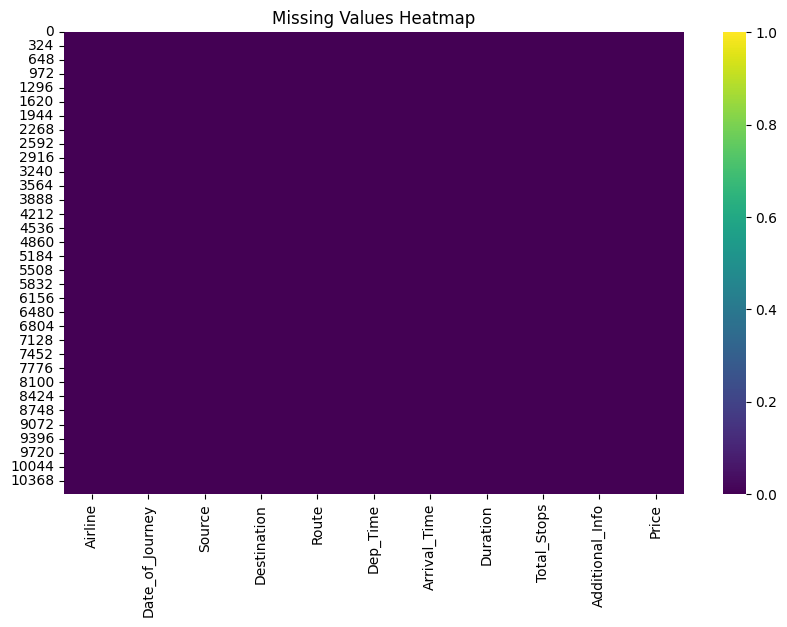

In [58]:
# Check dataset shape and missing values
print(f"Dataset shape: {df.shape}")
print(f"\nMissing values per column:")
print(df.isnull().sum())

# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=True, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

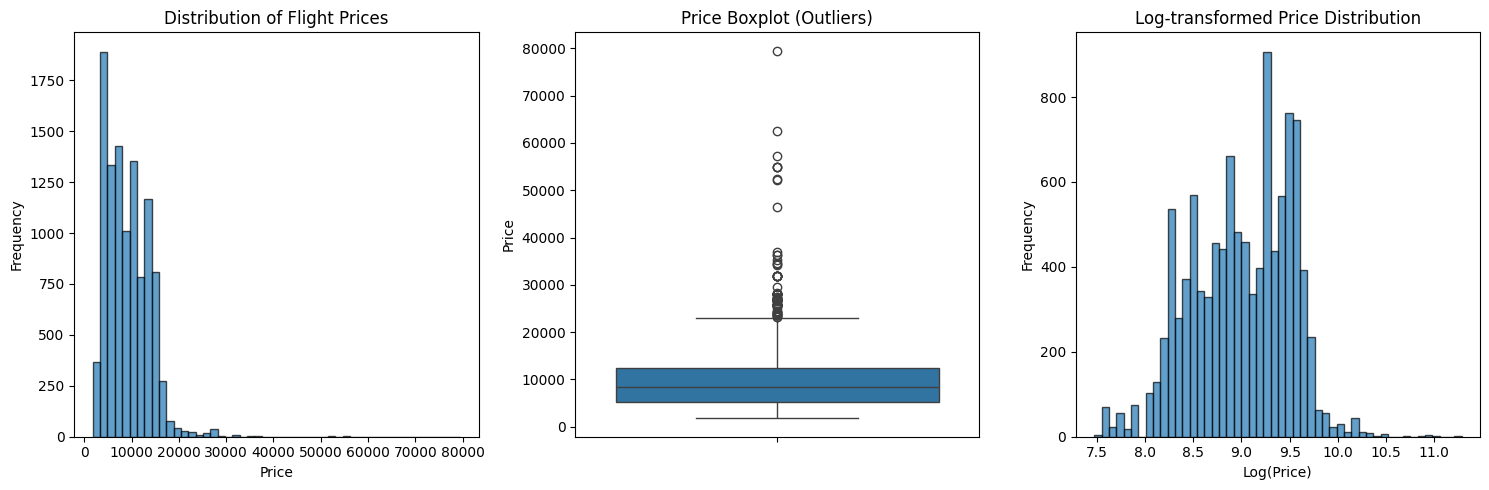

Price Statistics:
Min: ₹1,759
Max: ₹79,512
Mean: ₹9,087
Median: ₹8,372


In [59]:
# Price distribution analysis
plt.figure(figsize=(15, 5))

# Price histogram
plt.subplot(1, 3, 1)
plt.hist(df['Price'], bins=50, edgecolor='black', alpha=0.7)
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Price boxplot
plt.subplot(1, 3, 2)
sns.boxplot(y=df['Price'])
plt.title('Price Boxplot (Outliers)')

# Log-transformed price
plt.subplot(1, 3, 3)
plt.hist(np.log(df['Price']), bins=50, edgecolor='black', alpha=0.7)
plt.title('Log-transformed Price Distribution')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

print(f"Price Statistics:")
print(f"Min: ₹{df['Price'].min():,.0f}")
print(f"Max: ₹{df['Price'].max():,.0f}")
print(f"Mean: ₹{df['Price'].mean():,.0f}")
print(f"Median: ₹{df['Price'].median():,.0f}")

In [60]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


## 3. Feature Engineering and Data Preprocessing
In this section, we'll transform and engineer features to make them suitable for analysis and modeling.

### 3.1 Date Feature Engineering
We'll extract individual components (Date, Month, Year) from the 'Date_of_Journey' column to create separate features that can be more useful for analysis.

In [61]:
## Feature Engineering
df['Date']=df['Date_of_Journey'].str.split('/').str[0]
df['Month']=df['Date_of_Journey'].str.split('/').str[1]
df['Year']=df['Date_of_Journey'].str.split('/').str[2]

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
 11  Date             10683 non-null  object
 12  Month            10683 non-null  object
 13  Year             10683 non-null  object
dtypes: int64(1), object(13)
memory usage: 1.1+ MB


### Converting Date Components to Integer Type
After extracting date components as strings, we need to convert them to integers for numerical analysis:

In [63]:
df['Date']=df['Date'].astype(int)
df['Month']=df['Month'].astype(int)
df['Year']=df['Year'].astype(int)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
 11  Date             10683 non-null  int64 
 12  Month            10683 non-null  int64 
 13  Year             10683 non-null  int64 
dtypes: int64(4), object(10)
memory usage: 1.1+ MB


### Removing Original Date Column
Since we've extracted the required components, we can now remove the original 'Date_of_Journey' column to avoid redundancy:

In [65]:
## Drop Date Of Journey

df.drop('Date_of_Journey',axis=1,inplace=True)

In [66]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


### 3.2 Time Feature Engineering
Now we'll process the time-related features by extracting hour and minute components from arrival and departure times.

#### Processing Arrival Time
First, we'll clean the arrival time by removing any extra characters and extract hour/minute components:

In [67]:
df['Arrival_Time']=df['Arrival_Time'].apply(lambda x:x.split(' ')[0])

In [68]:
df['Arrival_hour']=df['Arrival_Time'].str.split(':').str[0]
df['Arrival_min']=df['Arrival_Time'].str.split(':').str[1]

In [69]:
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897,24,3,2019,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,13,15


#### Converting Arrival Time Components to Integer

In [70]:
df['Arrival_hour']=df['Arrival_hour'].astype(int)
df['Arrival_min']=df['Arrival_min'].astype(int)

In [71]:
df.drop('Arrival_Time',axis=1,inplace=True)

#### Removing Original Arrival_Time Column

In [72]:
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,1,5,2019,13,15


#### Processing Departure Time
Similar to arrival time, we'll extract hour and minute components from departure time:

In [73]:
df['Departure_hour']=df['Dep_Time'].str.split(':').str[0]
df['Departure_min']=df['Dep_Time'].str.split(':').str[1]

In [74]:
df['Departure_hour']=df['Departure_hour'].astype(int)
df['Departure_min']=df['Departure_min'].astype(int)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Duration         10683 non-null  object
 6   Total_Stops      10682 non-null  object
 7   Additional_Info  10683 non-null  object
 8   Price            10683 non-null  int64 
 9   Date             10683 non-null  int64 
 10  Month            10683 non-null  int64 
 11  Year             10683 non-null  int64 
 12  Arrival_hour     10683 non-null  int64 
 13  Arrival_min      10683 non-null  int64 
 14  Departure_hour   10683 non-null  int64 
 15  Departure_min    10683 non-null  int64 
dtypes: int64(8), object(8)
memory usage: 1.3+ MB


#### Removing Original Departure Time Column

In [76]:
df.drop('Dep_Time',axis=1,inplace=True)

In [77]:
df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Departure_hour,Departure_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50


### 3.3 Handling Missing Values and Categorical Features
Now we'll examine and process categorical features, particularly the 'Total_Stops' feature.

#### Analyzing Total_Stops Feature
Let's examine the unique values and check for missing data in the Total_Stops column:

In [78]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [79]:
df[df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Departure_hour,Departure_min
9039,Air India,Delhi,Cochin,NaN,23h 40m,NaN,No info,7480,6,5,2019,9,25,9,45


#### Identifying Missing Values in Total_Stops

In [80]:
df['Total_Stops'].mode()

0    1 stop
Name: Total_Stops, dtype: object

#### Finding the Mode for Missing Value Imputation
We'll use the most common value (mode) to fill missing values:

In [81]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

#### Converting Total_Stops to Numerical Values
We'll map the categorical stop values to numerical values for better analysis:
- 'non-stop' → 0
- '1 stop' → 1  
- '2 stops' → 2
- '3 stops' → 3
- '4 stops' → 4
- Missing values → 1 (mode value)

In [82]:
df['Total_Stops']=df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4,np.nan:1})

In [83]:
df[df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Departure_hour,Departure_min


#### Verifying Missing Values are Handled

In [84]:
df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Departure_hour,Departure_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,5,2019,13,15,5,50


### 3.4 Data Cleanup - Removing Unnecessary Columns
We'll remove columns that are not useful for our analysis or have been replaced by engineered features.

#### Removing Route Column
The Route column contains redundant information as we already have Source and Destination:

In [85]:
df.drop('Route',axis=1,inplace=True)

In [86]:
df.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Departure_hour,Departure_min
0,IndiGo,Banglore,New Delhi,2h 50m,0,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,2,No info,7662,1,5,2019,13,15,5,50


## 4. Exploratory Data Analysis of Key Features
Now let's explore the remaining features to understand their distributions and characteristics.

### 4.1 Duration Feature Analysis
Let's examine the duration feature and see if we need any further processing:

In [87]:
df['Duration'].str.split(' ').str[0].str.split('h').str[0]

0         2
1         7
2        19
3         5
4         4
         ..
10678     2
10679     2
10680     3
10681     2
10682     8
Name: Duration, Length: 10683, dtype: object

### 4.2 Categorical Features Analysis
Let's explore the unique values in our categorical features to understand the variety in our dataset.

#### Airlines in the Dataset

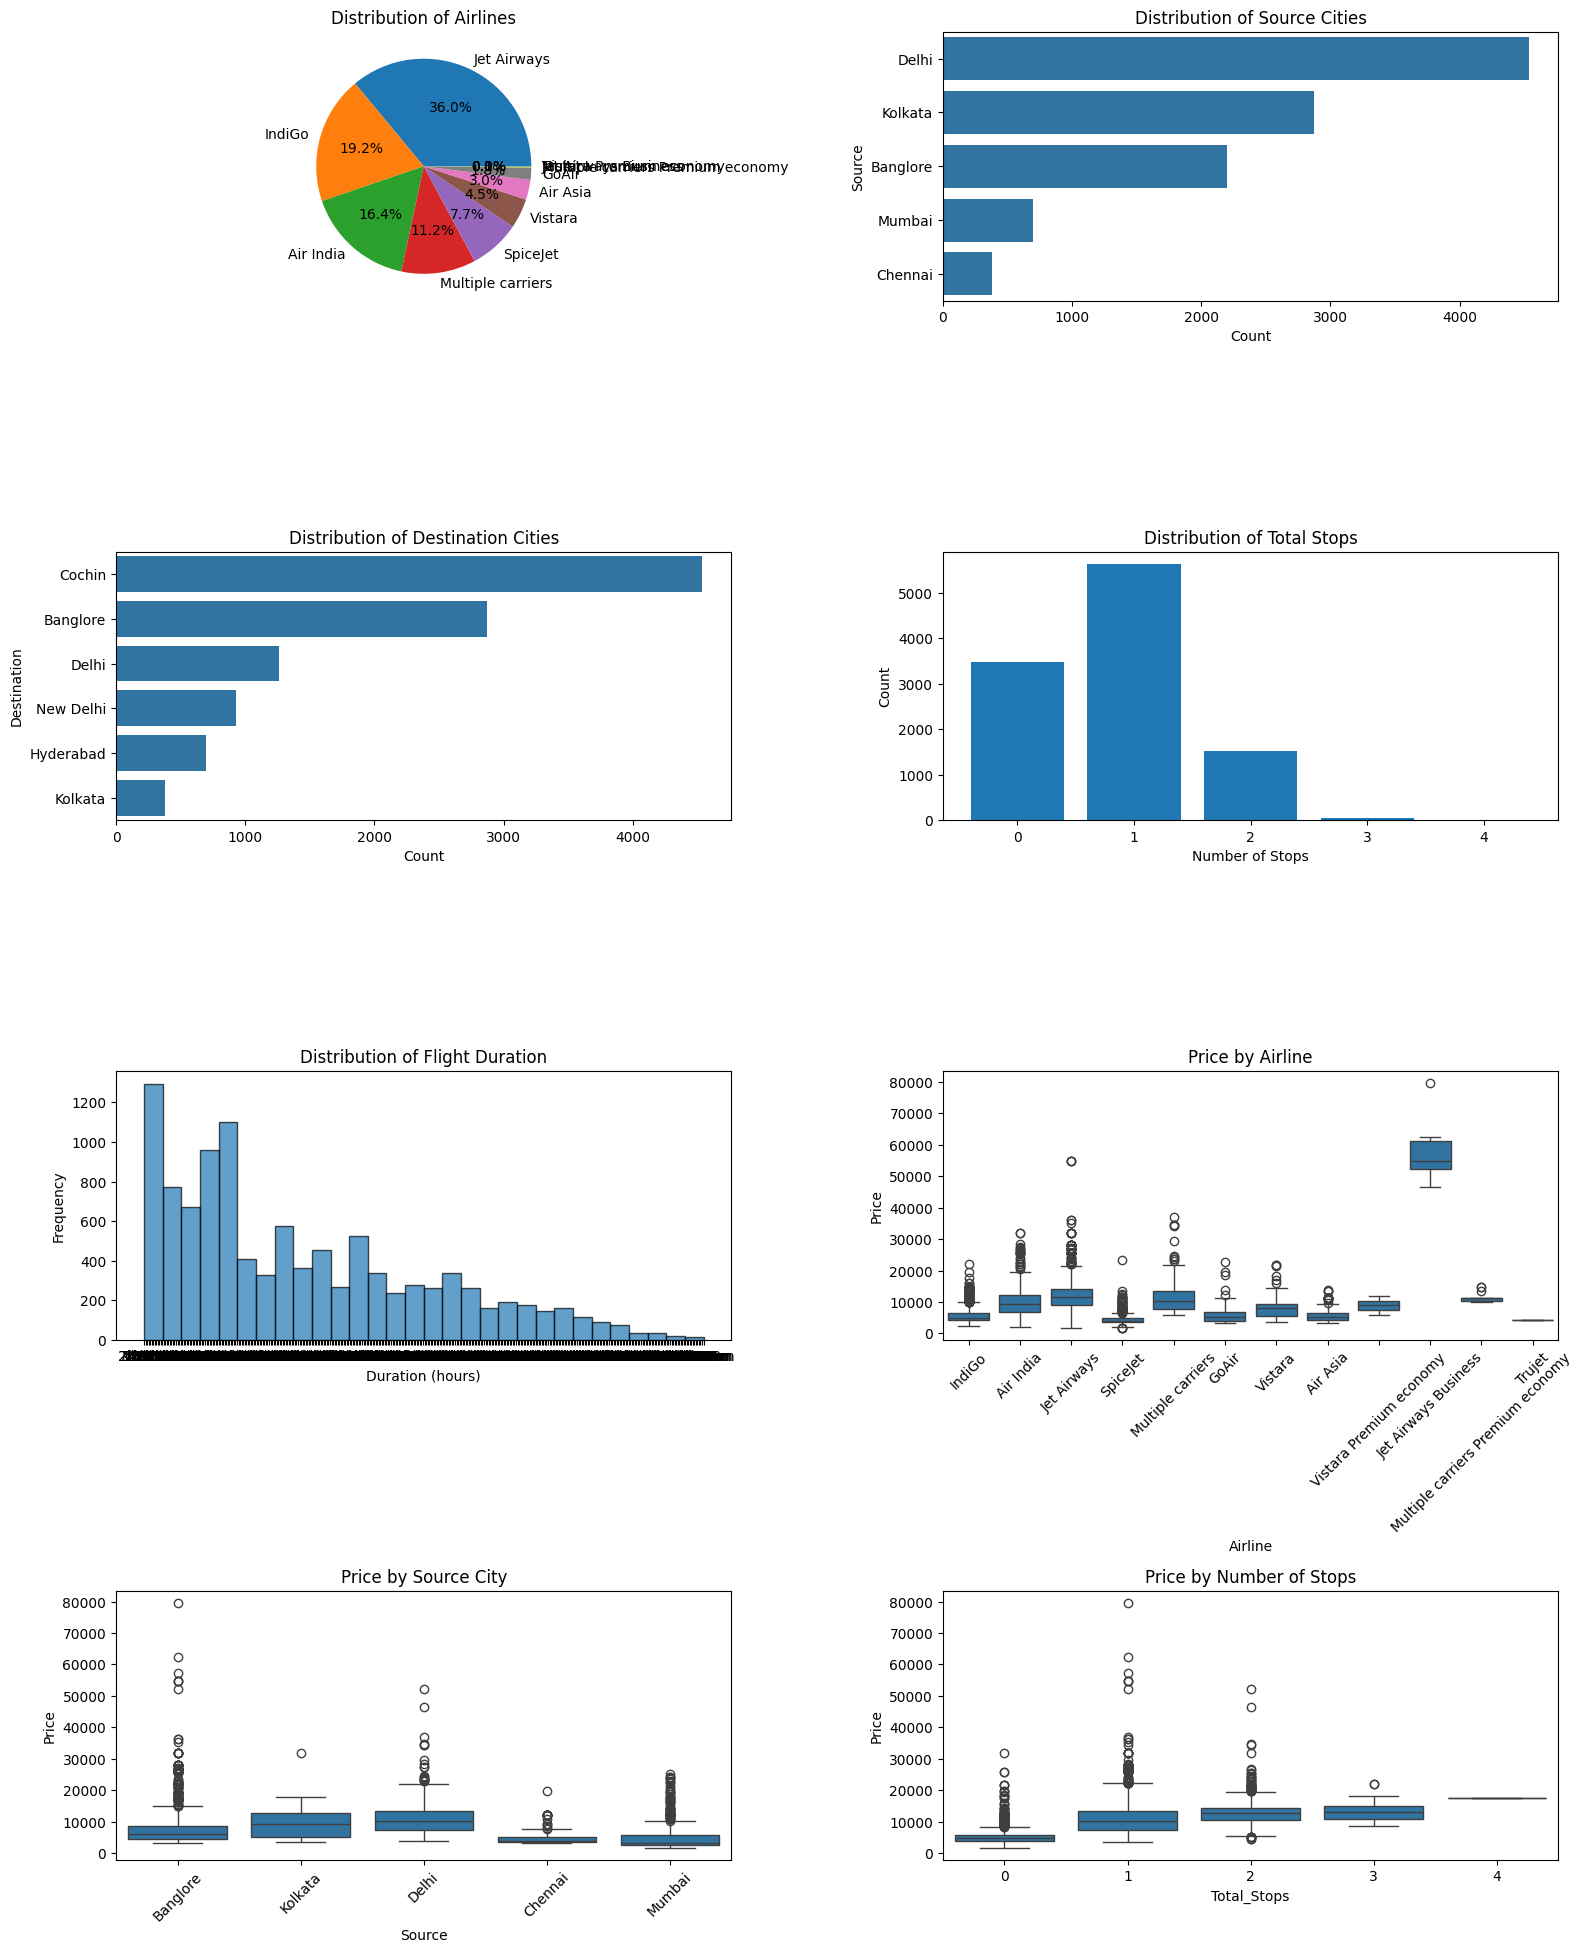

In [88]:
plt.figure(figsize=(16, 24))

# Airline distribution
plt.subplot(5, 2, 1)
plt.pie(airline_counts.values, labels=airline_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Airlines')

# Source city distribution
plt.subplot(5, 2, 2)
sns.barplot(x=source_counts.values, y=source_counts.index)
plt.title('Distribution of Source Cities')
plt.xlabel('Count')

# Destination city distribution
plt.subplot(5, 2, 3)
sns.barplot(x=dest_counts.values, y=dest_counts.index)
plt.title('Distribution of Destination Cities')
plt.xlabel('Count')

# Total stops distribution
plt.subplot(5, 2, 4)
plt.bar(stops_counts.index, stops_counts.values)
plt.title('Distribution of Total Stops')
plt.xlabel('Number of Stops')
plt.ylabel('Count')

# Duration distribution
plt.subplot(5, 2, 5)
plt.hist(df['Duration'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Flight Duration')
plt.xlabel('Duration (hours)')
plt.ylabel('Frequency')

# Price vs Airline
plt.subplot(5, 2, 6)
sns.boxplot(data=df, x='Airline', y='Price')
plt.title('Price by Airline')
plt.xticks(rotation=45)

# Price vs Source
plt.subplot(5, 2, 7)
sns.boxplot(data=df, x='Source', y='Price')
plt.title('Price by Source City')
plt.xticks(rotation=45)

# Price vs Total Stops
plt.subplot(5, 2, 8)
sns.boxplot(data=df, x='Total_Stops', y='Price')
plt.title('Price by Number of Stops')

plt.tight_layout()
plt.show()


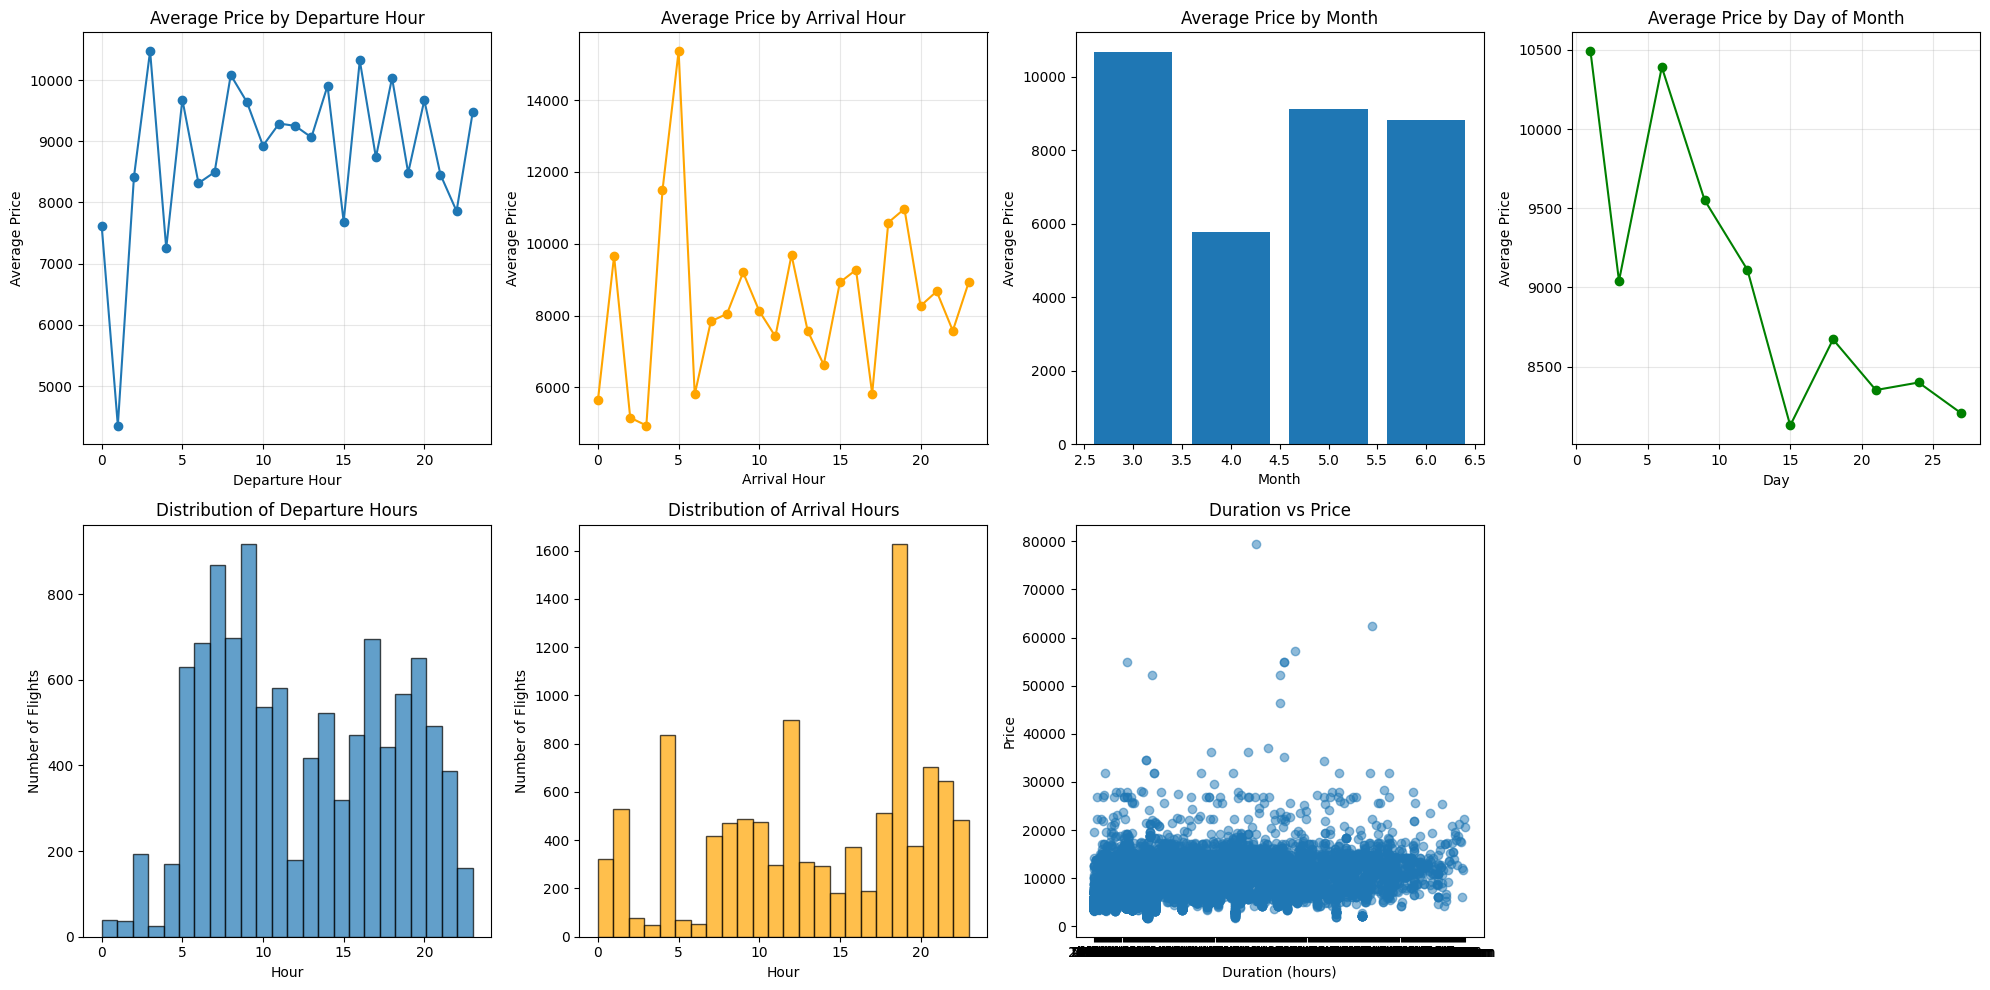

In [89]:
# Time-based analysis
plt.figure(figsize=(20, 10))

# Price by departure hour
plt.subplot(2, 4, 1)
hourly_prices = df.groupby('Departure_hour')['Price'].mean()
plt.plot(hourly_prices.index, hourly_prices.values, marker='o')
plt.title('Average Price by Departure Hour')
plt.xlabel('Departure Hour')
plt.ylabel('Average Price')
plt.grid(True, alpha=0.3)

# Price by arrival hour
plt.subplot(2, 4, 2)
arrival_prices = df.groupby('Arrival_hour')['Price'].mean()
plt.plot(arrival_prices.index, arrival_prices.values, marker='o', color='orange')
plt.title('Average Price by Arrival Hour')
plt.xlabel('Arrival Hour')
plt.ylabel('Average Price')
plt.grid(True, alpha=0.3)

# Price by month
plt.subplot(2, 4, 3)
monthly_prices = df.groupby('Month')['Price'].mean()
plt.bar(monthly_prices.index, monthly_prices.values)
plt.title('Average Price by Month')
plt.xlabel('Month')
plt.ylabel('Average Price')

# Price by day of month
plt.subplot(2, 4, 4)
daily_prices = df.groupby('Date')['Price'].mean()
plt.plot(daily_prices.index, daily_prices.values, marker='o', color='green')
plt.title('Average Price by Day of Month')
plt.xlabel('Day')
plt.ylabel('Average Price')
plt.grid(True, alpha=0.3)

# Departure hour distribution
plt.subplot(2, 4, 5)
plt.hist(df['Departure_hour'], bins=24, edgecolor='black', alpha=0.7)
plt.title('Distribution of Departure Hours')
plt.xlabel('Hour')
plt.ylabel('Number of Flights')

# Arrival hour distribution
plt.subplot(2, 4, 6)
plt.hist(df['Arrival_hour'], bins=24, edgecolor='black', alpha=0.7, color='orange')
plt.title('Distribution of Arrival Hours')
plt.xlabel('Hour')
plt.ylabel('Number of Flights')

# Duration vs Price scatter plot
plt.subplot(2, 4, 7)
plt.scatter(df['Duration'], df['Price'], alpha=0.5)
plt.title('Duration vs Price')
plt.xlabel('Duration (hours)')
plt.ylabel('Price')

plt.tight_layout()
plt.show()

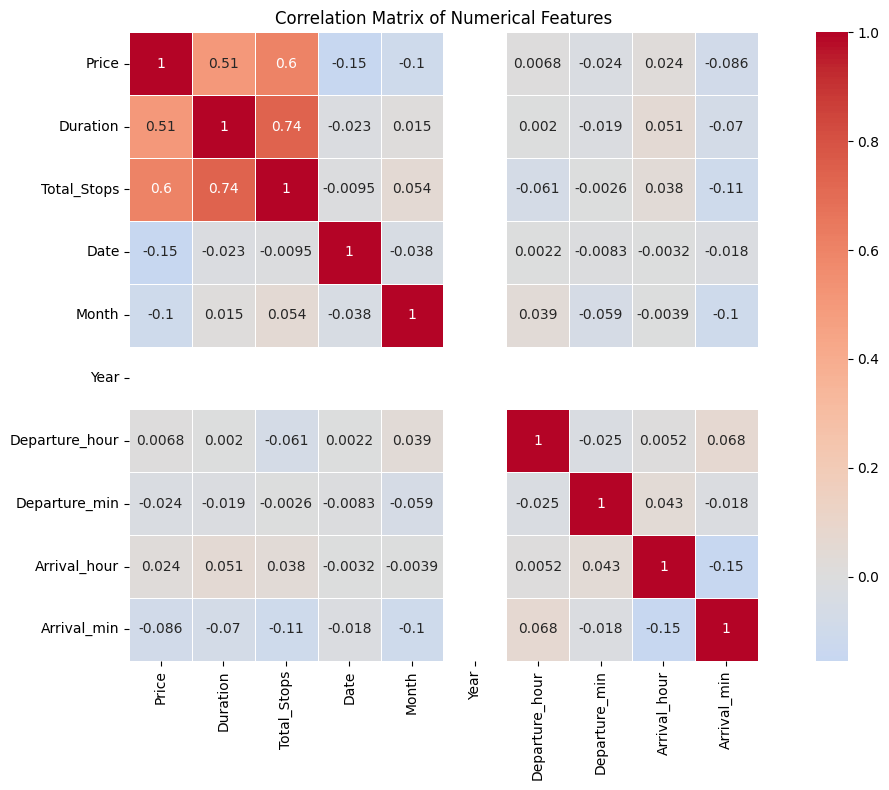

Features most correlated with Price:
Total_Stops: 0.604
Duration: 0.506
Date: 0.154
Month: 0.104


In [90]:
# Correlation analysis
numerical_cols = ['Price', 'Duration', 'Total_Stops', 'Date', 'Month', 'Year', 
                  'Departure_hour', 'Departure_min', 'Arrival_hour', 'Arrival_min']

plt.figure(figsize=(12, 8))
# Convert 'Duration' from string (e.g., '2h 50m', '5h', '50m') to float hours
def parse_duration(duration_str):
    hours = 0
    minutes = 0
    if 'h' in duration_str:
        hours_part = duration_str.split('h')[0]
        hours = int(hours_part.strip())
        duration_str = duration_str.split('h')[1]
    if 'm' in duration_str:
        minutes_part = duration_str.split('m')[0]
        minutes = int(minutes_part.strip())
    return hours + minutes / 60

df['Duration'] = df['Duration'].apply(parse_duration)
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

# Print strong correlations with Price
price_correlations = correlation_matrix['Price'].abs().sort_values(ascending=False)
print("Features most correlated with Price:")
for feature, corr in price_correlations.items():
    if feature != 'Price' and abs(corr) > 0.1:
        print(f"{feature}: {corr:.3f}")

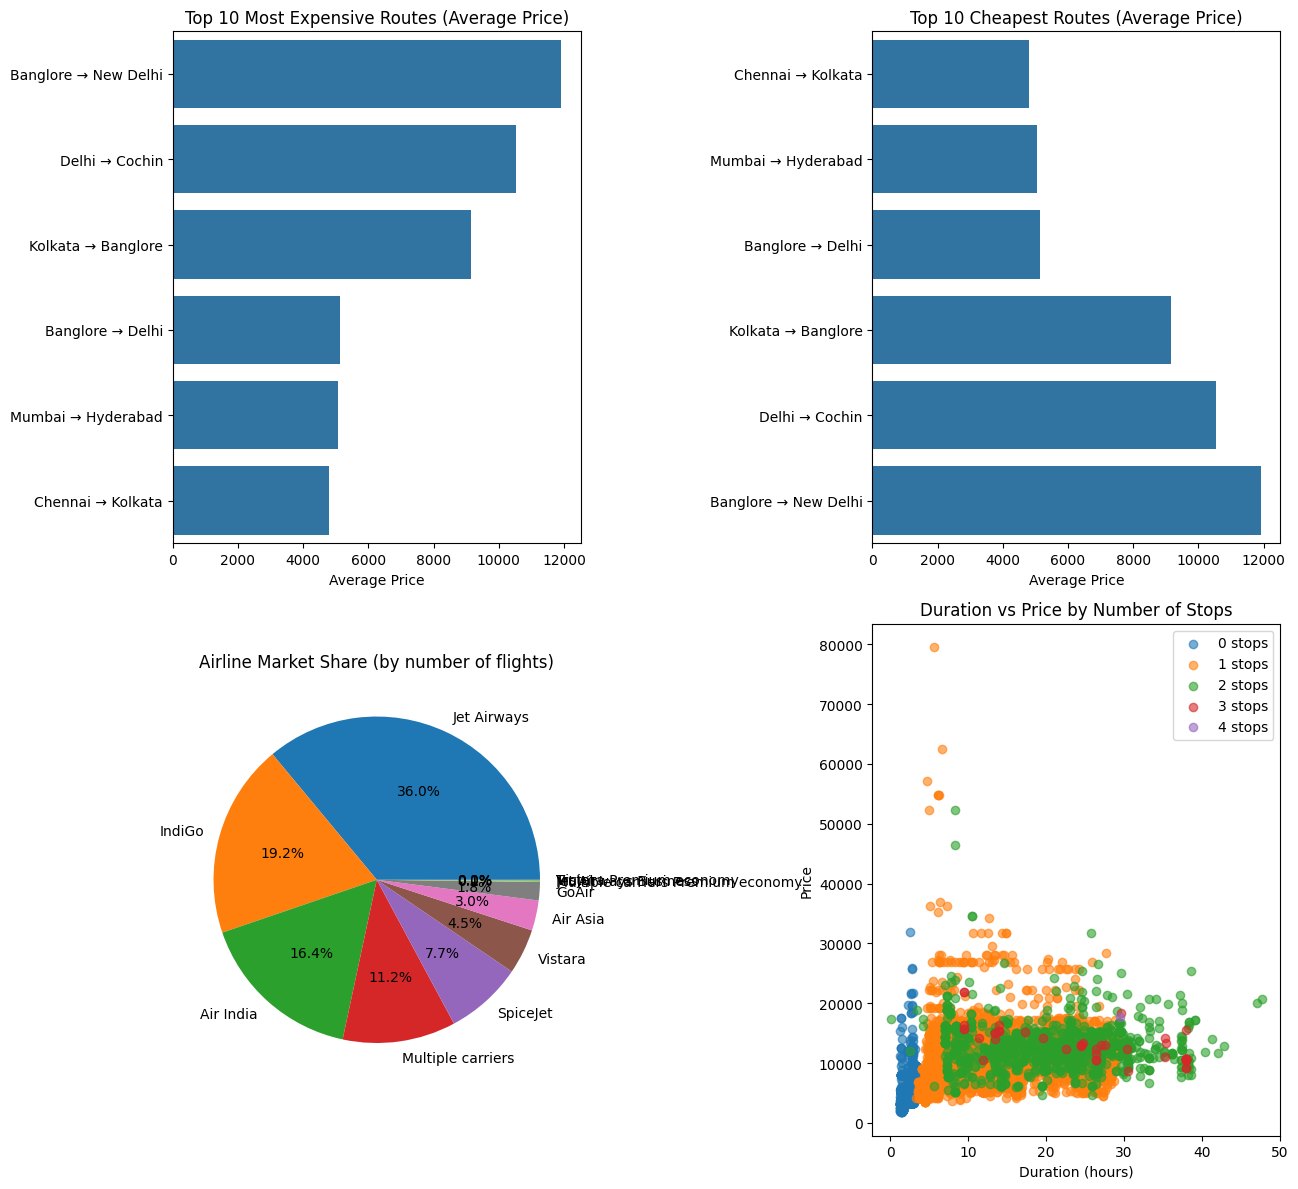

In [91]:
# Route analysis and insights
plt.figure(figsize=(20, 12))

# Most expensive routes
plt.subplot(2, 3, 1)
route_prices = df.groupby(['Source', 'Destination'])['Price'].mean().sort_values(ascending=False).head(10)
route_labels = [f"{src} → {dst}" for (src, dst) in route_prices.index]
sns.barplot(x=route_prices.values, y=route_labels)
plt.title('Top 10 Most Expensive Routes (Average Price)')
plt.xlabel('Average Price')

# Cheapest routes
plt.subplot(2, 3, 2)
cheap_routes = df.groupby(['Source', 'Destination'])['Price'].mean().sort_values().head(10)
cheap_labels = [f"{src} → {dst}" for (src, dst) in cheap_routes.index]
sns.barplot(x=cheap_routes.values, y=cheap_labels)
plt.title('Top 10 Cheapest Routes (Average Price)')
plt.xlabel('Average Price')

# Airline market share
plt.subplot(2, 3, 4)
airline_share = df['Airline'].value_counts()
plt.pie(airline_share.values, labels=airline_share.index, autopct='%1.1f%%')
plt.title('Airline Market Share (by number of flights)')

# Duration vs Price by stops
plt.subplot(2, 3, 5)
for stop in sorted(df['Total_Stops'].unique()):
    subset = df[df['Total_Stops'] == stop]
    plt.scatter(subset['Duration'], subset['Price'], label=f'{stop} stops', alpha=0.6)
plt.xlabel('Duration (hours)')
plt.ylabel('Price')
plt.title('Duration vs Price by Number of Stops')
plt.legend()

plt.tight_layout()
plt.show()

In [92]:
# Key insights and statistical analysis
print("=== KEY INSIGHTS FROM THE DATA ===\n")

# Price insights
print("1. PRICE ANALYSIS:")
print(f"   • Price range: ₹{df['Price'].min():,.0f} - ₹{df['Price'].max():,.0f}")
print(f"   • Average price: ₹{df['Price'].mean():,.0f}")
print(f"   • Most common price range: ₹{df['Price'].quantile(0.25):,.0f} - ₹{df['Price'].quantile(0.75):,.0f}")

# Airline insights
print("\n2. AIRLINE ANALYSIS:")
airline_stats = df.groupby('Airline')['Price'].agg(['mean', 'count']).round(0)
print(f"   • Most expensive airline: {airline_stats['mean'].idxmax()} (avg: ₹{airline_stats['mean'].max():,.0f})")
print(f"   • Cheapest airline: {airline_stats['mean'].idxmin()} (avg: ₹{airline_stats['mean'].min():,.0f})")
print(f"   • Most flights: {airline_stats['count'].idxmax()} ({airline_stats['count'].max():,.0f} flights)")

# Route insights
print("\n3. ROUTE ANALYSIS:")
route_stats = df.groupby(['Source', 'Destination'])['Price'].mean()
most_expensive_route = route_stats.idxmax()
cheapest_route = route_stats.idxmin()
print(f"   • Most expensive route: {most_expensive_route[0]} → {most_expensive_route[1]} (₹{route_stats.max():,.0f})")
print(f"   • Cheapest route: {cheapest_route[0]} → {cheapest_route[1]} (₹{route_stats.min():,.0f})")

# Stops impact
print("\n4. STOPS IMPACT:")
stops_price = df.groupby('Total_Stops')['Price'].mean()
print(f"   • Non-stop flights: ₹{stops_price[0]:,.0f} (average)")
print(f"   • 1-stop flights: ₹{stops_price[1]:,.0f} (average)")
if 2 in stops_price.index:
    print(f"   • 2-stop flights: ₹{stops_price[2]:,.0f} (average)")

# Time insights
print("\n6. TIME PATTERNS:")
morning_flights = df[df['Departure_hour'].between(6, 11)]['Price'].mean()
afternoon_flights = df[df['Departure_hour'].between(12, 17)]['Price'].mean()
evening_flights = df[df['Departure_hour'].between(18, 23)]['Price'].mean()
print(f"   • Morning flights (6-11 AM): ₹{morning_flights:,.0f}")
print(f"   • Afternoon flights (12-5 PM): ₹{afternoon_flights:,.0f}")
print(f"   • Evening flights (6-11 PM): ₹{evening_flights:,.0f}")

# Duration insights
print("\n7. DURATION ANALYSIS:")
print(f"   • Shortest flight: {df['Duration'].min():.1f} hours")
print(f"   • Longest flight: {df['Duration'].max():.1f} hours")
print(f"   • Average duration: {df['Duration'].mean():.1f} hours")

print("\n" + "="*50)

=== KEY INSIGHTS FROM THE DATA ===

1. PRICE ANALYSIS:
   • Price range: ₹1,759 - ₹79,512
   • Average price: ₹9,087
   • Most common price range: ₹5,277 - ₹12,373

2. AIRLINE ANALYSIS:
   • Most expensive airline: Jet Airways Business (avg: ₹58,359)
   • Cheapest airline: Trujet (avg: ₹4,140)
   • Most flights: Jet Airways (3,849 flights)

3. ROUTE ANALYSIS:
   • Most expensive route: Banglore → New Delhi (₹11,918)
   • Cheapest route: Chennai → Kolkata (₹4,790)

4. STOPS IMPACT:
   • Non-stop flights: ₹5,025 (average)
   • 1-stop flights: ₹10,594 (average)
   • 2-stop flights: ₹12,716 (average)

6. TIME PATTERNS:
   • Morning flights (6-11 AM): ₹9,132
   • Afternoon flights (12-5 PM): ₹9,218
   • Evening flights (6-11 PM): ₹8,989

7. DURATION ANALYSIS:
   • Shortest flight: 0.1 hours
   • Longest flight: 47.7 hours
   • Average duration: 10.7 hours



In [93]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [94]:
df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

#### Source Cities in the Dataset

In [95]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

#### Additional Information Feature
Examining what additional information is provided about flights:

In [96]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


## 5. Preparing Data for Machine Learning
Now we'll prepare our data for machine learning by encoding categorical variables.

### 5.1 Installing Required Libraries
First, let's install scikit-learn for machine learning preprocessing:

In [97]:

from sklearn.preprocessing import OneHotEncoder

### 5.2 One-Hot Encoding for Categorical Variables
We'll use One-Hot Encoding to convert categorical variables into numerical format that machine learning algorithms can process.

In [98]:
encoder=OneHotEncoder()

#### Creating OneHotEncoder Instance

In [99]:
encoder.fit_transform(df[['Airline','Source','Destination']]).toarray()

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.]], shape=(10683, 23))

#### Applying One-Hot Encoding to Key Categorical Features
We'll encode Airline, Source, and Destination columns into numerical format:

In [100]:
pd.DataFrame(encoder.fit_transform(df[['Airline','Source','Destination']]).toarray(),columns=encoder.get_feature_names_out())

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10679,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10680,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


#### Creating a DataFrame with Encoded Features
Converting the encoded array back to a DataFrame with proper column names for better understanding: